<a href="https://colab.research.google.com/github/davidfox87/neuro_encoding_models/blob/master/filter_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparison of basis vector strength between neural and behavioral parameters

Content creator: David Fox

In [2]:
#@title Clone the github repository 
!git clone https://github.com/davidfox87/neuro_encoding_models

Cloning into 'neuro_encoding_models'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 659 (delta 28), reused 20 (delta 10), pack-reused 598
Receiving objects: 100% (659/659), 84.59 MiB | 41.52 MiB/s, done.
Resolving deltas: 100% (374/374), done.


In [20]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
%cd neuro_encoding_models/

/content/neuro_encoding_models


In [5]:
#@title add package to google colab
import sys, os
sys.path.append(os.getcwd())

In [6]:
#@title import modules

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import pickle


# load pickle files

In [24]:
pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/vmoves_out.pkl', 'rb')
vmoves_out = pickle.load(pkl_file)

pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/vymoves_out.pkl', 'rb')
vymoves_out = pickle.load(pkl_file)

pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/angvturns_out.pkl', 'rb')
angvturns_out = pickle.load(pkl_file)

pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/pn1_out.pkl', 'rb')
pn1_out = pickle.load(pkl_file)

dt = 0.001
t = np.arange(len(vmoves_out['response'])) * dt
tpn = np.arange(len(pn1_out['response'])) * dt

pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/basis.pkl', 'rb')
basis = pickle.load(pkl_file)

pkl_file = open('/content/drive/MyDrive/temporal_filter_data_files_for_colab/average_neural_data.pkl', 'rb')
average_neural_data = pickle.load(pkl_file)

orn_mu = average_neural_data['mean_orn_stim_filter'][1]
orn_sigma = average_neural_data['mean_orn_stim_filter'][2]

orn_mu2 = average_neural_data['mean_orn_postspike_filter'][1]
orn_sigma2 = average_neural_data['mean_orn_postspike_filter'][2]

orn_predictions_mu = average_neural_data['mean_orn_psth_prediction']
orn_exp_responses_mu = average_neural_data['mean_orn_psth_experiment']

pn_mu = average_neural_data['mean_pn_stim_filter'][1]
pn_sigma = average_neural_data['mean_pn_stim_filter'][2]

pn_mu2 = average_neural_data['mean_pn_postspike_filter'][1]
pn_sigma2 = average_neural_data['mean_pn_postspike_filter'][2]

pn_predictions_mu = average_neural_data['mean_pn_psth_prediction']
pn_exp_responses_mu = average_neural_data['mean_pn_psth_experiment']
orn_basis_weights = average_neural_data['orn_basis_weights']
pn_basis_weights = average_neural_data['pn_basis_weights']
kt = average_neural_data['mean_orn_stim_filter'][0]
ht = average_neural_data['mean_orn_postspike_filter'][0]

In [59]:
font = {'family' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


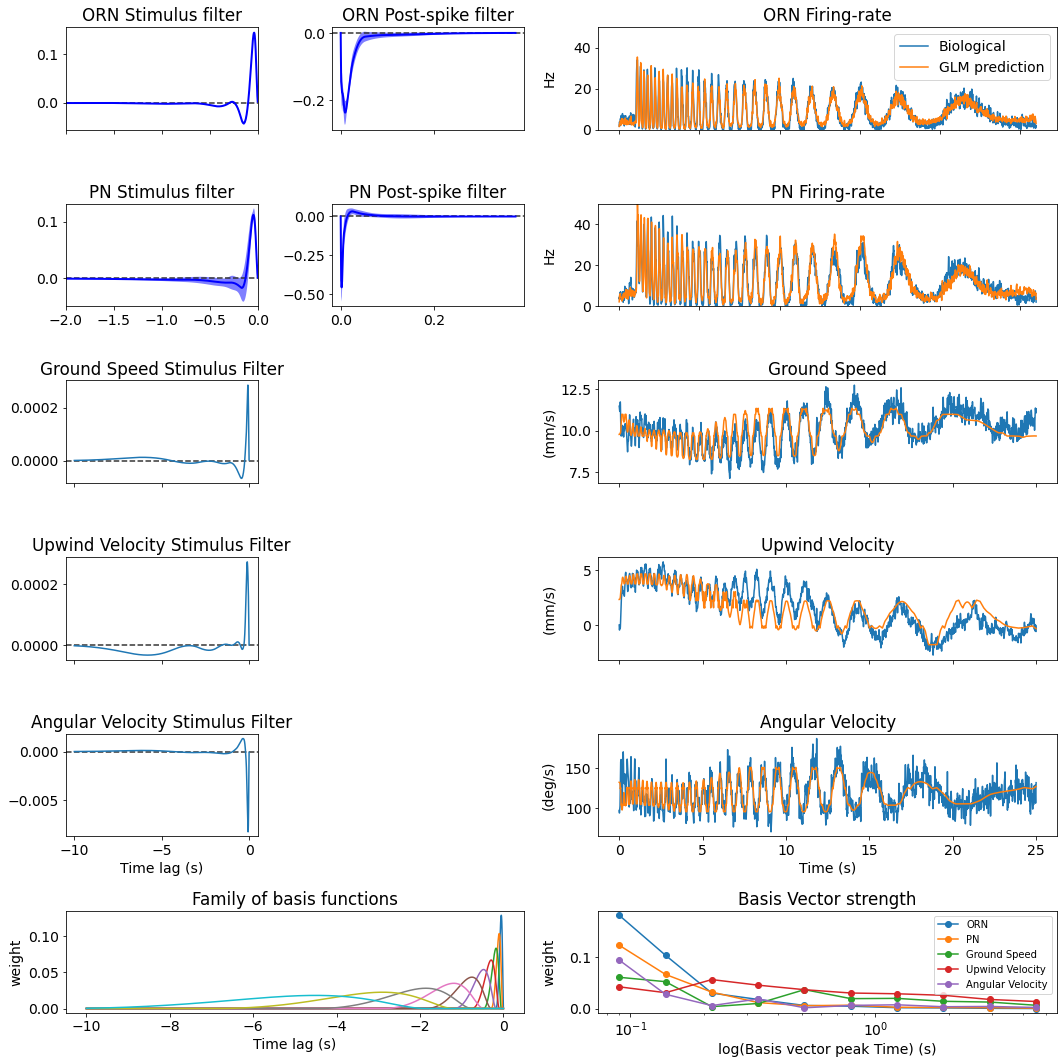

In [60]:


fig = plt.figure(figsize=[15, 15])
ax1 = plt.subplot2grid((12, 4), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((12, 4), (0, 1), rowspan=2)
ax3 = plt.subplot2grid((12, 4), (0, 2), colspan=2, rowspan=2)

ax4 = plt.subplot2grid((12, 4), (2, 0), rowspan=2)
ax5 = plt.subplot2grid((12, 4), (2, 1), rowspan=2)
ax6 = plt.subplot2grid((12, 4), (2, 2), colspan=2, rowspan=2)


ax7 = plt.subplot2grid((12, 4), (4, 0), rowspan=2)
ax8 = plt.subplot2grid((12, 4), (4, 2), colspan=2, rowspan=2)

ax9 = plt.subplot2grid((12, 4), (6, 0), rowspan=2)
ax10 = plt.subplot2grid((12, 4), (6, 2), colspan=2, rowspan=2)

ax11 = plt.subplot2grid((12, 4), (8, 0), rowspan=2)
ax12 = plt.subplot2grid((12, 4), (8, 2), colspan=2, rowspan=2)

ax13 = plt.subplot2grid((12, 4), (10, 0), colspan=2, rowspan=2)
ax14 = plt.subplot2grid((12, 4), (10, 2), colspan=2, rowspan=2)

ax1.plot(kt, orn_mu, lw=2, label='mean population 1', color='blue')
ax1.fill_between(kt, orn_mu + orn_sigma, orn_mu - orn_sigma, facecolor='blue', alpha=0.5)
ax1.axhline(0, color=".2", linestyle="--", zorder=1)

ax2.plot(ht, orn_mu2, lw=2, label='mean population 1', color='blue')
ax2.fill_between(ht, orn_mu2 + orn_sigma2, orn_mu2 - orn_sigma2, facecolor='blue', alpha=0.5)
ax2.axhline(0, color=".2", linestyle="--", zorder=1)


ax3.plot(orn_exp_responses_mu, label='Biological')
ax3.plot(orn_predictions_mu, label='GLM prediction')
ax3.set_ylabel('Hz')
ax3.set_ylim(0, 50)
ax3.legend()


ax4.plot(kt, pn_mu, lw=2, label='mean population 1', color='blue')
ax4.fill_between(kt, pn_mu + pn_sigma, pn_mu - pn_sigma, facecolor='blue', alpha=0.5)
ax4.axhline(0, color=".2", linestyle="--", zorder=1)

ax5.plot(ht, pn_mu2, lw=2, label='mean population 1', color='blue')
ax5.fill_between(ht, pn_mu2 + pn_sigma2, pn_mu2 - pn_sigma2, facecolor='blue', alpha=0.5)
ax5.axhline(0, color=".2", linestyle="--", zorder=1)

ax6.plot(pn_exp_responses_mu, label='Biological')
ax6.plot(pn_predictions_mu, label='GLM prediction')
ax6.set_ylabel('Hz')
ax6.set_ylim(0, 50)



ax7.plot(vmoves_out['k'][0], vmoves_out['k'][1])
ax7.axhline(0, color=".2", linestyle="--", zorder=1)
ax8.plot(t, vmoves_out['response'])
ax8.plot(t, vmoves_out['prediction'][1])
ax8.set_title('Ground Speed')
ax8.set_ylabel('(mm/s)')

ax9.plot(vymoves_out['k'][0], vymoves_out['k'][1])
ax9.axhline(0, color=".2", linestyle="--", zorder=1)
ax10.plot(t, vymoves_out['response'])
ax10.plot(t, vymoves_out['prediction'][1])
ax10.set_title('Upwind Velocity')
ax10.set_ylabel('(mm/s)')

ax11.plot(angvturns_out['k'][0], angvturns_out['k'][1])
ax11.axhline(0, color=".2", linestyle="--", zorder=1)
ax12.plot(t, angvturns_out['response'])
ax12.plot(t, angvturns_out['prediction'][1])
ax12.set_title('Angular Velocity')
ax12.set_xlabel('Time (s)')
ax12.set_ylabel('(deg/s)')
ax11.set_xlabel('Time lag (s)')


ax13.plot(basis['basis'][0], basis['basis'][1])
ax13.set_title('Family of basis functions')
ax13.set_xlabel('Time lag (s)')
ax13.set_ylabel('weight')


ax14.plot(vmoves_out['basis_center'], np.mean(orn_basis_weights, axis=0), '-o', label='ORN')
ax14.plot(vmoves_out['basis_center'], np.mean(pn_basis_weights, axis=0), '-o', label='PN')
ax14.plot(vmoves_out['basis_center'], vmoves_out['basis_weights'], '-o', label='Ground Speed')
ax14.plot(vymoves_out['basis_center'], vymoves_out['basis_weights'], '-o', label='Upwind Velocity')
ax14.plot(angvturns_out['basis_center'], angvturns_out['basis_weights'], '-o', label='Angular Velocity')
ax14.set_xscale('log')
ax14.legend(loc=1, prop={'size': 10})
ax14.set_title('Basis Vector strength')
ax14.set_xlabel('log(Basis vector peak Time) (s)')
ax14.set_ylabel('weight')


fig.align_ylabels([ax3, ax6, ax8, ax10, ax12, ax14])

ax1.set_title('ORN Stimulus filter')
ax2.set_title('ORN Post-spike filter')
ax4.set_title('PN Stimulus filter')
ax5.set_title('PN Post-spike filter')
ax3.set_title('ORN Firing-rate')
ax6.set_title('PN Firing-rate')
ax7.set_title('Ground Speed Stimulus Filter')
ax9.set_title('Upwind Velocity Stimulus Filter')
ax11.set_title('Angular Velocity Stimulus Filter')

ax1.tick_params(labelbottom=False)  
ax2.tick_params(labelbottom=False) 
ax3.tick_params(labelbottom=False) 
 
ax6.tick_params(labelbottom=False) 
ax7.tick_params(labelbottom=False) 
ax8.tick_params(labelbottom=False) 
ax9.tick_params(labelbottom=False) 
ax10.tick_params(labelbottom=False) 

ax1.set_xlim(-2, 0)
ax4.set_xlim(-2, 0)
fig.tight_layout()

In [ ]:


fig = plt.figure(constrained_layout=True, figsize=[20, 10])
spec2 = gridspec.GridSpec(ncols=5, nrows=6, figure=fig)

f_ax0_1 = fig.add_subplot(spec2[0, :2])
f_ax0_2 = fig.add_subplot(spec2[0, 2:])
f_ax0_1.plot(pn1_out['k'][0], pn1_out['k'][1])
f_ax0_1.axhline(0, color=".2", linestyle="--", zorder=1)
f_ax0_2.plot(tpn, pn1_out['response'])
f_ax0_2.plot(tpn, pn1_out['prediction'][1])
f_ax0_1.set_title('PN Firing-rate')
f_ax0_2.set_ylabel('(Hz)')

f_ax1_1 = fig.add_subplot(spec2[1, :2])
f_ax1_2 = fig.add_subplot(spec2[1, 2:])
f_ax1_1.plot(vmoves_out['k'][0], vmoves_out['k'][1])
f_ax1_1.axhline(0, color=".2", linestyle="--", zorder=1)
f_ax1_2.plot(t, vmoves_out['response'])
f_ax1_2.plot(t, vmoves_out['prediction'][1])
f_ax1_1.set_title('Ground Speed')
f_ax1_2.set_ylabel('(mm/s)')

f_ax2_1 = fig.add_subplot(spec2[2, :2])
f_ax2_2 = fig.add_subplot(spec2[2, 2:])
f_ax2_1.plot(vymoves_out['k'][0], vymoves_out['k'][1])
f_ax2_1.axhline(0, color=".2", linestyle="--", zorder=1)
f_ax2_2.plot(t, vymoves_out['response'])
f_ax2_2.plot(t, vymoves_out['prediction'][1])
f_ax2_1.set_title('Upwind Velocity')
f_ax2_2.set_ylabel('(mm/s)')

f_ax3_1 = fig.add_subplot(spec2[3, :2])
f_ax3_2 = fig.add_subplot(spec2[3, 2:])
f_ax3_1.plot(angvturns_out['k'][0], angvturns_out['k'][1])
f_ax3_1.axhline(0, color=".2", linestyle="--", zorder=1)
f_ax3_2.plot(t, angvturns_out['response'])
f_ax3_2.plot(t, angvturns_out['prediction'][1])
f_ax3_1.set_title('Angular Velocity')
f_ax3_2.set_xlabel('Time (s)')
f_ax3_2.set_ylabel('(deg/s)')
f_ax3_1.set_xlabel('Time lag (s)')

f_ax4_1 = fig.add_subplot(spec2[4:, 2:])
f_ax4_1.plot(pn1_out['basis_center'], pn1_out['basis_weights'], '-o', label='PN')
f_ax4_1.plot(vmoves_out['basis_center'], vmoves_out['basis_weights'], '-o', label='Ground Speed')
f_ax4_1.plot(vymoves_out['basis_center'], vymoves_out['basis_weights'], '-o', label='Upwind Velocity')
f_ax4_1.plot(angvturns_out['basis_center'], angvturns_out['basis_weights'], '-o', label='Angular Velocity')
f_ax4_1.set_xscale('log')
f_ax4_1.legend(loc=1, prop={'size': 10})
f_ax4_1.set_title('Basis Vector strength')
f_ax4_1.set_xlabel('log(Basis vector peak Time) (s)')


f_ax5_1 = fig.add_subplot(spec2[4:, :2])
f_ax5_1.plot(basis['basis'][0], basis['basis'][1])
f_ax5_1.set_title('Family of basis functions')
f_ax5_1.set_xlabel('Time lag (s)')

fig.align_ylabels([f_ax0_2, f_ax1_2, f_ax2_2, f_ax3_2])

plt.show()